In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [233]:
df = pd.read_csv('FINAL_FINAL.csv')

#taking Quantitative Vars
df = df[['Event number of finishers', 'hours category', 'age_at_race', 'maxtemp', 'Elevation gain', 'Finishing Position', 'distance']]
df.dropna(inplace=True)
df = df.astype(int)

#Pulling Label
dfLabel = df['hours category']
df=df.drop(['hours category'], axis=1)

len(df)



47861

In [234]:
#standardize
scaler = StandardScaler()
df = scaler.fit_transform(df)


In [235]:
## Instantiate PCA 2 components
MyPCA=PCA(n_components=2)

# Project the original data into the PCA space
Result=MyPCA.fit_transform(df)

print("The eigenvalues:", MyPCA.explained_variance_)
print("The relative eigenvalues are:",MyPCA.explained_variance_ratio_)
print("Total Explained Variance with 2 components:",sum(MyPCA.explained_variance_ratio_))





The eigenvalues: [1.95928107 1.29469598]
The relative eigenvalues are: [0.32654002 0.21577815]
Total Explained Variance with 2 components: 0.5423181763170728


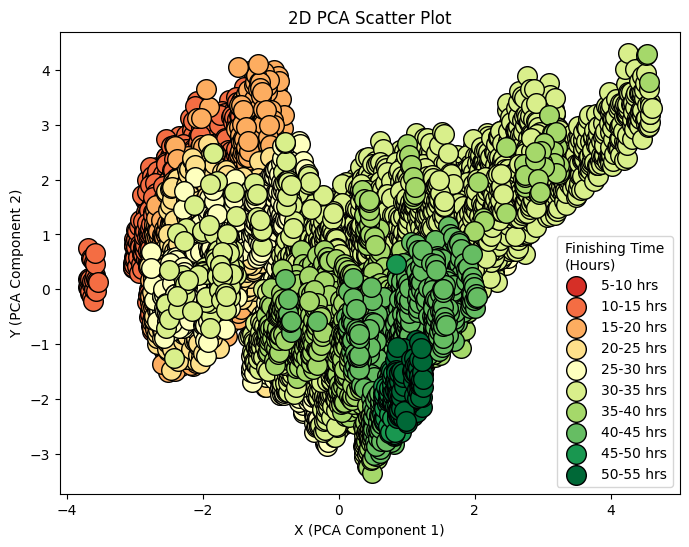

In [236]:

x = Result[:, 0]
y = Result[:, 1]

unique_labels = np.unique(dfLabel)  # Get unique labels for legend
custom_labels = {
    0: "0-5 hrs", 
    1: "5-10 hrs", 
    2: "10-15 hrs", 
    3: "15-20 hrs", 
    4: "20-25 hrs",
    5: "25-30 hrs",
    6: "30-35 hrs",
    7: "35-40 hrs",
    8: "40-45 hrs",
    9: "45-50 hrs",
    10: "50-55 hrs",
    11: "55-60 hrs"
}


cmap = plt.get_cmap("RdYlGn")
plt.figure(figsize=(8, 6))

# Plotring each class separately to create a legend
for label in unique_labels:
    idx = dfLabel == label  
    plt.scatter(x[idx], y[idx], c=[cmap(label / max(unique_labels))], 
                edgecolor='k', s=200, label=custom_labels.get(label, f"Category {label}"))

# Labels and title
plt.xlabel('X (PCA Component 1)')
plt.ylabel('Y (PCA Component 2)')
plt.title('2D PCA Scatter Plot')
plt.legend(title="Finishing Time\n(Hours)")

plt.show()


In [237]:
## Instantiate PCA 3 components
MyPCA=PCA(n_components=3)

# Project the original data into the PCA space
Result=MyPCA.fit_transform(df)

print("The eigenvalues:", MyPCA.explained_variance_)
print("The relative eigenvalues are:",MyPCA.explained_variance_ratio_)
print("Total Explained Variance with 3 components:",sum(MyPCA.explained_variance_ratio_))


The eigenvalues: [1.95928107 1.29469598 1.01793606]
The relative eigenvalues are: [0.32654002 0.21577815 0.16965246]
Total Explained Variance with 3 components: 0.711970640911624


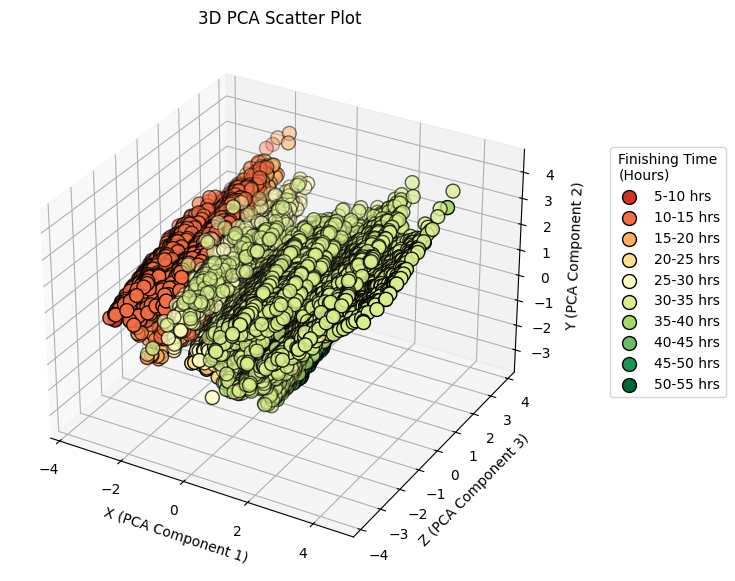

In [238]:

x = Result[:, 0]
y = Result[:, 1]
z = Result[:, 2] 


cmap = plt.get_cmap("RdYlGn")
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each class separately to create a legend
for label in unique_labels:
    idx = dfLabel == label  
    ax.scatter(x[idx], z[idx], y[idx], 
               c=[cmap(label / max(unique_labels))], 
               edgecolor='k', s=100, label=custom_labels.get(label, f"Category {label}"))


ax.set_xlabel('X (PCA Component 1)')
ax.set_ylabel('Z (PCA Component 3)')
ax.set_zlabel('Y (PCA Component 2)')
ax.set_title('3D PCA Scatter Plot')
ax.legend(title="Finishing Time\n(Hours)")
ax.legend(title="Finishing Time\n(Hours)", loc='upper left', bbox_to_anchor=(1.1, 0.8))

plt.show()


In [239]:
## Instantiate PCA 95% components
MyPCA=PCA(n_components=5)

# Project the original data into the PCA space
Result=MyPCA.fit_transform(df)

print("The eigenvalues:", MyPCA.explained_variance_)
print("The relative eigenvalues are:",MyPCA.explained_variance_ratio_)
print("Total Explained Variance with 5 components:",sum(MyPCA.explained_variance_ratio_))



The eigenvalues: [1.95928107 1.29469598 1.01793606 0.97103038 0.42412981]
The relative eigenvalues are: [0.32654002 0.21577815 0.16965246 0.16183502 0.07068683]
Total Explained Variance with 5 components: 0.9444924815761362
